In [1]:
import os
import pickle
import random
import re
import string

import matplotlib.pyplot as plt
%matplotlib inline

from argparse import Namespace
from nltk.corpus import stopwords
from nltk.corpus import twitter_samples
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from dotenv import load_dotenv
from collections import Counter

import nltk
import pandas as pd

In [2]:
#imports 
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score, plot_confusion_matrix,plot_roc_curve
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
# from keras.models import Sequential
# from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
# from keras import utils
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools


C:\Users\rishabhstha\AppData\Local\Programs\Python\Python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
load_dotenv("nltkTweets/.env")

True

In [5]:
#Downloading the twitter data from NLTK corpus and creating csv file and dataframe
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\rishabhstha\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [3]:
positive = twitter_samples.strings('positive_tweets.json')
negative = twitter_samples.strings('negative_tweets.json')
all_tweets = twitter_samples.strings("tweets.20150430-223406.json")

In [4]:
positive_df=pd.DataFrame(positive,columns=["Tweets"])
negative_df=pd.DataFrame(negative,columns=["Tweets"])
alltweets_df=pd.DataFrame(all_tweets,columns=["Tweets"])
positive_df['Label']='positive'
negative_df['Label']='negative'

In [5]:
frames=[positive_df,negative_df]
posNeg_tweets=pd.concat(frames)

In [7]:
posNeg_tweets

,Tweets,Label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive
2,@DespiteOfficial we had a listen last night :)...,positive
3,@97sides CONGRATS :),positive
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive
...,...,...
4995,I wanna change my avi but uSanele :(,negative
4996,MY PUPPY BROKE HER FOOT :(,negative
4997,where's all the jaebum baby pictures :((,negative
4998,But but Mr Ahmad Maslan cooks too :( https://t...,negative


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishabhstha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Text(0.5, 1.0, 'Distribuition of Labels in the dataset')

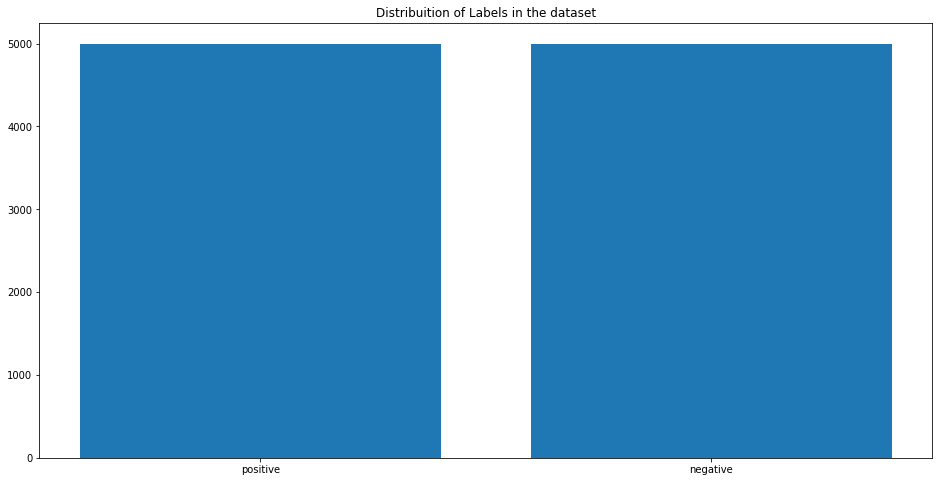

In [9]:
label_count = Counter(posNeg_tweets.Label)
label_count
plt.figure(figsize=(16,8))
plt.bar(label_count.keys(), label_count.values())
plt.title("Distribuition of Labels in the dataset")

In [11]:
#Pre-processing dataset
# stop_words = stopwords.words("english")
# stemmer = SnowballStemmer("english")

# TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
# def preprocess(text, stem=False):
#     # Remove link,user and special characters
#     text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
#     text=text.replace('\d+','')
#     tokens = []
#     for token in text.split():
#         if token not in stop_words:
#             if stem:
#                 tokens.append(stemmer.stem(token))
#             else:
#                 tokens.append(token)
#     return " ".join(tokens)

In [10]:
import re
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    text = re.sub('<.*?>+', '', text)
 #   text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [12]:
posNeg_tweets['cleaned Tweets']=posNeg_tweets['Tweets'].apply(lambda x: clean_text(x))

In [13]:
posNeg_tweets

,Tweets,Label,cleaned Tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive,followfriday france inte milipol paris for b...
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive,hey james how odd please call our contact ce...
2,@DespiteOfficial we had a listen last night :)...,positive,despiteofficial we had a listen last night as...
3,@97sides CONGRATS :),positive,congrats
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive,yeaaaah yippppy my accnt verified rqst has suc...
...,...,...,...
4995,I wanna change my avi but uSanele :(,negative,i wanna change my avi but usanele
4996,MY PUPPY BROKE HER FOOT :(,negative,my puppy broke her foot
4997,where's all the jaebum baby pictures :((,negative,where s all the jaebum baby pictures
4998,But but Mr Ahmad Maslan cooks too :( https://t...,negative,but but mr ahmad maslan cooks too


In [14]:
#visualization using wordcloud for the positive tweets
from wordcloud import WordCloud,STOPWORDS

df=posNeg_tweets[posNeg_tweets['Label']=='positive']
words = ' '.join(df['cleaned Tweets'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(cleaned_word)



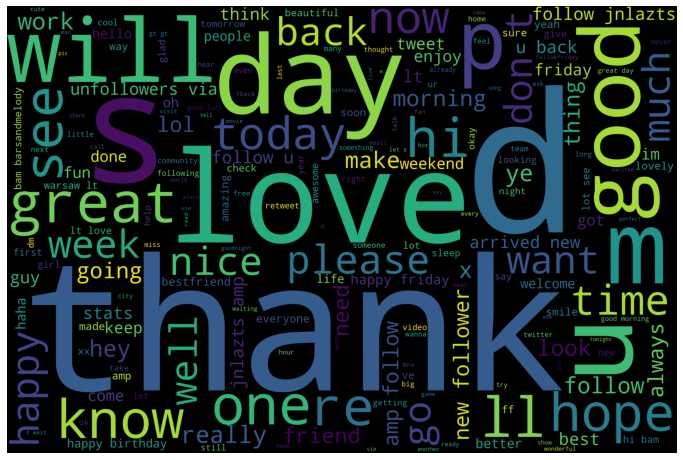

In [15]:
#plotting wordclouds

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
#encoding labels
posNeg_tweets['Sentiment']=posNeg_tweets['Label'].apply(lambda x: 0 if x=='negative' else 1)
posNeg_tweets.tail()

,Tweets,Label,cleaned Tweets,Sentiment
4995,I wanna change my avi but uSanele :(,negative,i wanna change my avi but usanele,0
4996,MY PUPPY BROKE HER FOOT :(,negative,my puppy broke her foot,0
4997,where's all the jaebum baby pictures :((,negative,where s all the jaebum baby pictures,0
4998,But but Mr Ahmad Maslan cooks too :( https://t...,negative,but but mr ahmad maslan cooks too,0
4999,@eawoman As a Hull supporter I am expecting a ...,negative,eawoman as a hull supporter i am expecting a ...,0


In [18]:
# def tweet_to_words(raw_tweet):
#     letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
#     words = letters_only.lower().split()                             
#     stops = set(stopwords.words("english"))                  
#     meaningful_words = [w for w in words if not w in stops] 
#     return( " ".join( meaningful_words )) 

# posNeg_tweets['new_tweet']=posNeg_tweets['Tweets'].apply(lambda x: tweet_to_words(x))

In [19]:
# def clean_tweet_length(raw_tweet):
#     letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
#     words = letters_only.lower().split()                             
#     stops = set(stopwords.words("english"))                  
#     meaningful_words = [w for w in words if not w in stops] 
#     return(len(meaningful_words)) 

# posNeg_tweets['Tweet_length']=posNeg_tweets['Tweets'].apply(lambda x: clean_tweet_length(x))

In [17]:
posNeg_tweets

,Tweets,Label,cleaned Tweets,Sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,positive,followfriday france inte milipol paris for b...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,positive,hey james how odd please call our contact ce...,1
2,@DespiteOfficial we had a listen last night :)...,positive,despiteofficial we had a listen last night as...,1
3,@97sides CONGRATS :),positive,congrats,1
4,yeaaaah yippppy!!! my accnt verified rqst has...,positive,yeaaaah yippppy my accnt verified rqst has suc...,1
...,...,...,...,...
4995,I wanna change my avi but uSanele :(,negative,i wanna change my avi but usanele,0
4996,MY PUPPY BROKE HER FOOT :(,negative,my puppy broke her foot,0
4997,where's all the jaebum baby pictures :((,negative,where s all the jaebum baby pictures,0
4998,But but Mr Ahmad Maslan cooks too :( https://t...,negative,but but mr ahmad maslan cooks too,0


In [18]:
train,test = train_test_split(posNeg_tweets,test_size=0.2,random_state=42)

In [19]:
train.Sentiment.value_counts()

0    4012
1    3988
Name: Sentiment, dtype: int64

In [20]:
#appending tweets to train and test list
train_tweet=[]
for tweet in train['cleaned Tweets']:
    train_tweet.append(tweet)
test_tweet=[]
for tweet in test['cleaned Tweets']:
    test_tweet.append(tweet)

In [21]:
#feature extraction from tweets using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_tweet)
test_features=v.transform(test_tweet)

In [22]:
#visualizing the corpus after countvectorizer 
pd.DataFrame(train_features.toarray(), 
            index=['sentence '+str(i) 
                   for i in range(1, 1+len(train_tweet))],
            columns=v.get_feature_names())

,aa,aaaaaand,aaaaahhhhhhhh,aaaahh,aaaahhh,aaahhh,aah,aahliyahr,aaj,aaliyuhx,...,zulbayarb,zy,zynovftw,zyrophobia,zysuzyy,zz,zzz,zzzterror,zzzz,zzzzzz
sentence 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
sentence 5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 7996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 7997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 7998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sentence 7999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#using tf-idf for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(min_df=1, stop_words='english')
train_features= tf.fit_transform(train_tweet)
test_features=tf.transform(test_tweet)
# tf.fit(list(X_train) + list(X_test))
# X_train_vec=tf.transform(X_train)
# X_test_vec=tf.transform(X_test)

In [24]:
#visualizing the corpus after tfidf  vectorizer 
pd.DataFrame(train_features.toarray(), 
            index=['sentence '+str(i) 
                   for i in range(1, 1+len(train_tweet))],
            columns=tf.get_feature_names())

,aa,aaaaaand,aaaaahhhhhhhh,aaaahh,aaaahhh,aaahhh,aah,aahliyahr,aaj,aaliyuhx,...,zulbayarb,zy,zynovftw,zyrophobia,zysuzyy,zz,zzz,zzzterror,zzzz,zzzzzz
sentence 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
sentence 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
sentence 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
sentence 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.705791,0.0
sentence 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sentence 7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
sentence 7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
sentence 7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
sentence 7999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [25]:
train_features

<8000x14614 sparse matrix of type '<class 'numpy.float64'>'
	with 43394 stored elements in Compressed Sparse Row format>

In [26]:
#Model development(Change)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [27]:
Classifiers = [ #??
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]


Accuracy of LogisticRegression is 0.573
Classification Report of LogisticRegression
               precision    recall  f1-score   support

           0       0.54      0.99      0.70       988
           1       0.96      0.16      0.28      1012

    accuracy                           0.57      2000
   macro avg       0.75      0.58      0.49      2000
weighted avg       0.75      0.57      0.49      2000

Confusion matrix : 
[[981   7]
 [847 165]]
ROC_AUC = 0.5779792290089772



Accuracy of KNeighborsClassifier is 0.5905
Classification Report of KNeighborsClassifier
               precision    recall  f1-score   support

           0       0.55      0.95      0.70       988
           1       0.83      0.24      0.37      1012

    accuracy                           0.59      2000
   macro avg       0.69      0.59      0.53      2000
weighted avg       0.69      0.59      0.53      2000

Confusion matrix : 
[[940  48]
 [771 241]]
ROC_AUC = 0.5947796482693508



Accuracy of SVC is 0.

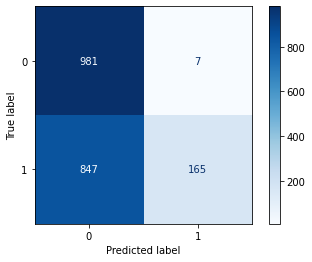

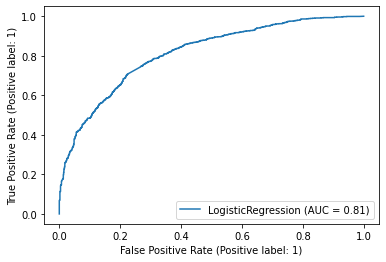

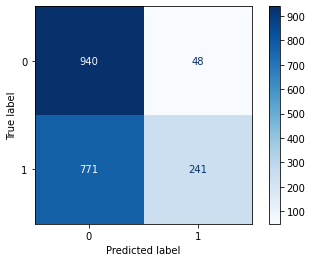

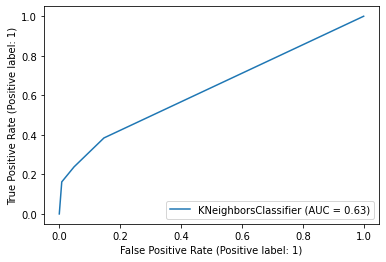

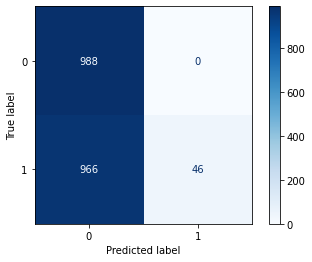

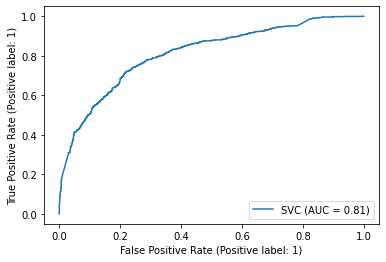

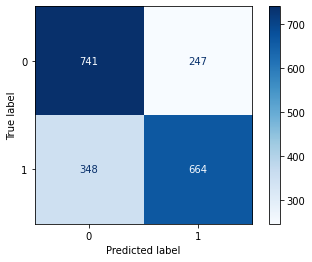

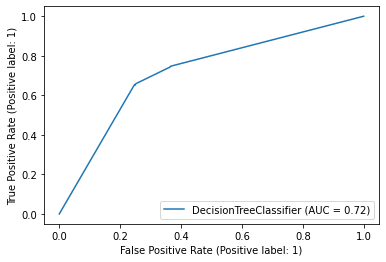

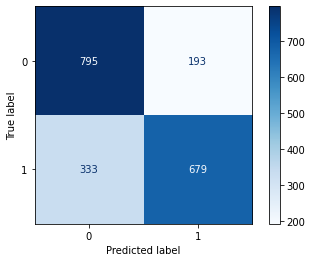

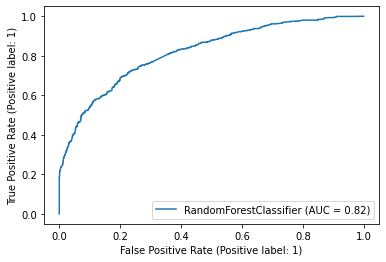

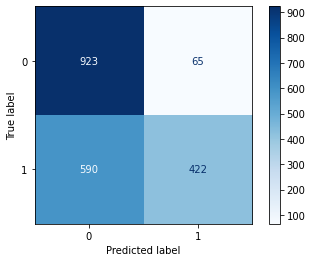

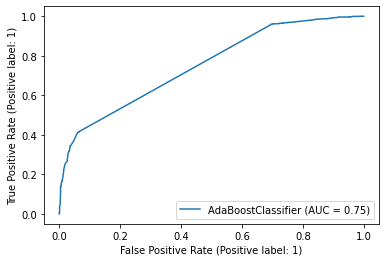

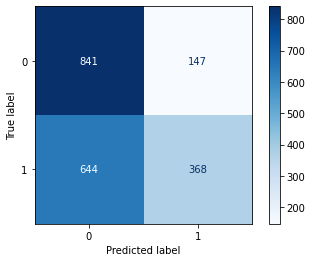

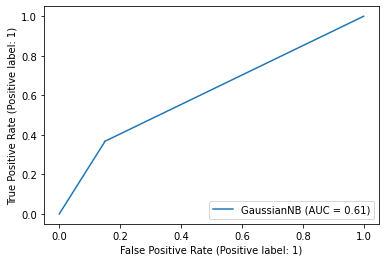

In [28]:
#Accuracy for cleaned Tweets
dense_features=train_features.toarray() ##?
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['Sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(test['Sentiment'], pred)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  
   
    print('Classification Report of '+classifier.__class__.__name__+"\n",classification_report(test['Sentiment'], pred))
    try:
        print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
        plot_confusion_matrix(fit, test_features, test['Sentiment'],cmap=plt.cm.Blues)
        roc_auc = roc_auc_score(test['Sentiment'], pred)
        print("ROC_AUC = {}".format(roc_auc))   
        plot_roc_curve(fit, test_features, test['Sentiment'])
    except:
        print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
        plot_confusion_matrix(fit, dense_test, test['Sentiment'],cmap=plt.cm.Blues)
        roc_auc = roc_auc_score(test['Sentiment'], pred)
        print("ROC_AUC = {}".format(roc_auc))   
        plot_roc_curve(fit, dense_test, test['Sentiment'])
    print("\n\n")

Text(0.5, 1.0, 'Accuracy of Models')

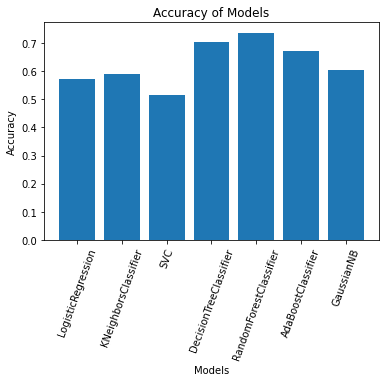

In [29]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model, rotation=70)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy of Models')

In [33]:
#Checking for SGd classifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(dense_features,train['Sentiment'])
#Pipeline(steps=[('standardscaler', StandardScaler()),('sgdclassifier', SGDClassifier())])

pred = clf.predict(dense_test)
print(accuracy_score(test['Sentiment'], pred))

0.6415


In [ ]:
#MLP Classifier


Accuracy of LogisticRegression is 0.5915
Classification Report ofLogisticRegression
               precision    recall  f1-score   support

           0       0.55      0.98      0.70       988
           1       0.92      0.21      0.34      1012

    accuracy                           0.59      2000
   macro avg       0.74      0.60      0.52      2000
weighted avg       0.74      0.59      0.52      2000

Confusion matrix : 
[[970  18]
 [799 213]]
Confusion matrix ofLogisticRegression
ROC_AUC = 0.5961278424093069
Accuracy of KNeighborsClassifier is 0.634
Classification Report ofKNeighborsClassifier
               precision    recall  f1-score   support

           0       0.59      0.89      0.71       988
           1       0.78      0.39      0.52      1012

    accuracy                           0.63      2000
   macro avg       0.68      0.64      0.61      2000
weighted avg       0.68      0.63      0.61      2000

Confusion matrix : 
[[876 112]
 [620 392]]
Confusion matrix ofK

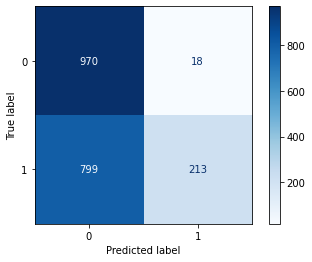

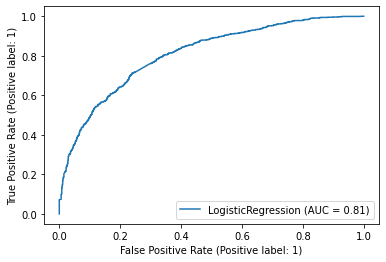

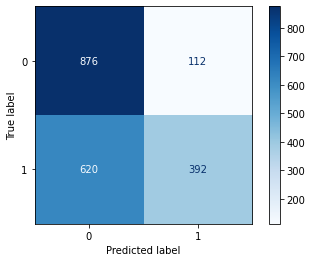

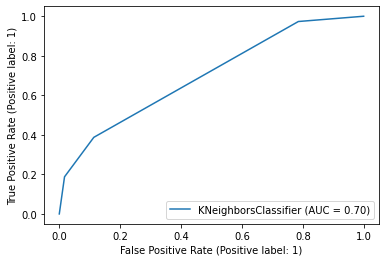

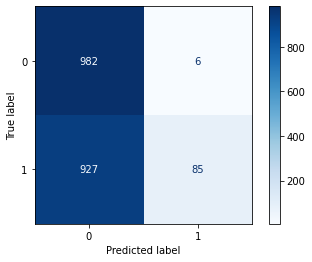

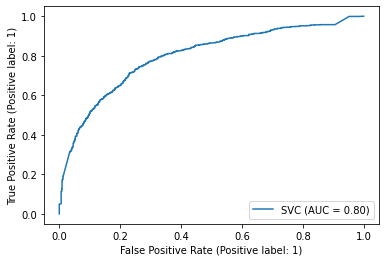

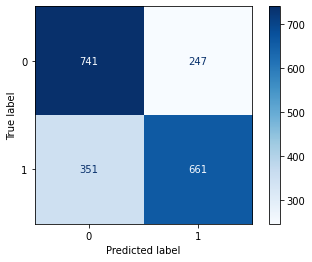

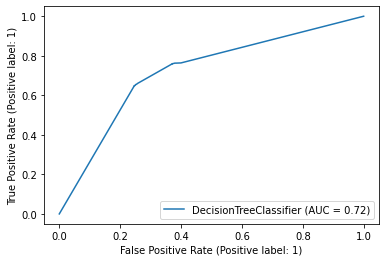

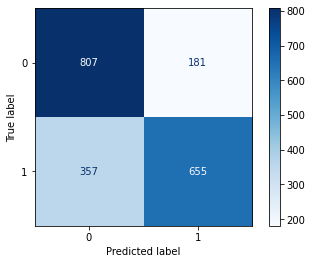

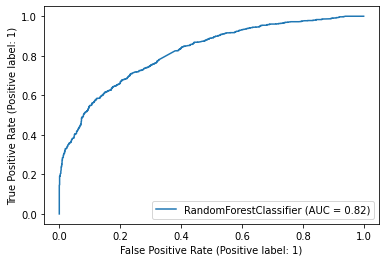

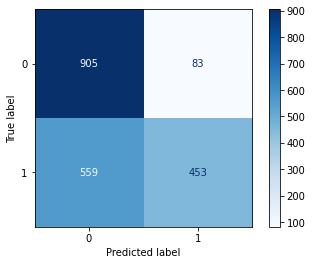

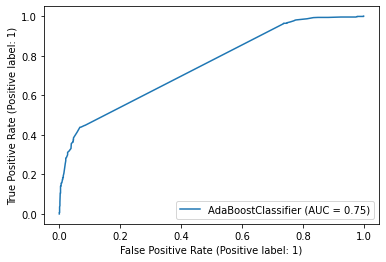

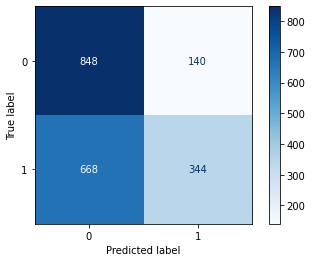

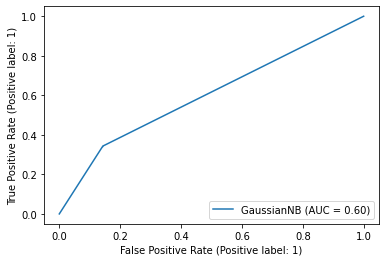

In [34]:
#Checking accuracy for tf-idf
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['Sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['Sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(test['Sentiment'], pred)
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))  
   
    print('Classification Report of'+classifier.__class__.__name__+"\n",classification_report(test['Sentiment'], pred))
    try:
        print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
        print("Confusion matrix of"+classifier.__class__.__name__+"\n",plot_confusion_matrix(fit, test_features, test['Sentiment'],cmap=plt.cm.Blues))
        roc_auc = roc_auc_score(test['Sentiment'], pred)
        print("ROC_AUC = {}".format(roc_auc))   
        plot_roc_curve(fit, test_features, test['Sentiment'])
    except:
        print('Confusion matrix : \n{}'.format(confusion_matrix(test['Sentiment'],pred)))
        print("Confusion matrix of"+classifier.__class__.__name__+"\n",plot_confusion_matrix(fit, dense_test, test['Sentiment'],cmap=plt.cm.Blues))
        roc_auc = roc_auc_score(test['Sentiment'], pred)
        print("ROC_AUC = {}".format(roc_auc))   
        plot_roc_curve(fit, dense_test, test['Sentiment'])

In [35]:
#check for other model evaluation types
#hyper arameter tunin
#roc curves
